### This program will solve the  Mountain - Car problem using RL Q-learning¶
 - Mountain - Car defines "solving" as getting average reward of -110.0 over 100 consecutive trials
 
 - Q-learning formula -

 <img src= "q_learning.svg" align="left">

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
env = gym.make("MountainCar-v0")

In [3]:
# print the action space size
action_size = env.action_space.n
print(action_size)

3


In [4]:
# print state space 
print(env.observation_space.high)
print(env.observation_space.low)
print(env.goal_position)

[0.6  0.07]
[-1.2  -0.07]
0.5


In [5]:
N = 20 # how many buckets
windth_of_buckets = (env.observation_space.high - env.observation_space.low)/N
print (windth_of_buckets)

[0.09  0.007]


In [6]:
# this funcation is given a state and transrom it to corresponding discrete value
def get_discrete_value(state):
    return (((state - env.observation_space.low) % N) / windth_of_buckets).astype(int)

In [11]:
# initialize a Q - table of size 20X20X3,entry for each of the 3 action and pair of states
q_table = np.random.uniform(low = -2 ,high = 0 , size = (N,N,action_size))
re_array = []

In [12]:
# set standard RL parameters
alpha = 0.1   # Learning Rate
gemma = 0.99    # Discount Factor

# Number of episodes 
num_of_episode = 3000

#  Exploration/Exploitation  parameters
epsilon = 1.0  # Exploration rate
max_epsilon = 1.0  # Exploration probability at start
min_epsilon = 0.01  # Minimum exploration probability
decay_rate = 0.01  # Exponential decay rate for exploration prob

In [13]:
# train the agent
for episode in range(num_of_episode):
    
    cur_re = 0
    
    # Reset the environment
    state = env.reset()
    
    # discretize the state  
    position, velocity = get_discrete_value(state)
    
    done = False
    
#     # render laste 10 episodes
#     if (episode > (num_of_episode-10)):
#         render = True
#     else:
#         render = False
    
    while not done:
                
#         if render:
#             env.render()
        
        # choose an action according to epsilon-greedy policy
        # If rand number < less than epsilon - take a random choice (exploration) 
        if np.random.uniform(0,1) < epsilon:
            action = np.random.randint(0,2)
       
        # else take action with maximum expected future reward(exploitation)
        else:
            action = np.argmax(q_table[position,velocity,:])
       
        # take a step 
        new_state, reward, done, info = env.step(action)
        
        cur_re += reward
       
        # discretize new state  
        new_position, new_velocity = get_discrete_value(new_state)
        
        # Update Q(s,a):= Q(s,a) + alpha * [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        if not done:
            q_table[position,velocity,action] = q_table[position,velocity,action] + alpha *(reward + gemma 
                                                * np.max(q_table[new_position,new_velocity]) 
                                                 - q_table[position,velocity,action])
                                                
        # if goal is reach update Q-value (reward = 0) 
        elif new_state[0] >= env.goal_position: 
            q_table[position,velocity,action] = 0
        
        # set new state as cuurent state
        position = new_position 
        velocity = new_velocity
   
    # decrease epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    re_array.append(cur_re)
    
print("End Training")

End Training


In [15]:
post_train = []

# see how agent preforms after training
num_of_episode_after_training = 3000
total_reward = 0

for episode in range(num_of_episode_after_training):
    
    cur_re = 0
    
    state = env.reset()
    
    position, velocity = get_discrete_value(state)
    
    done = False

    while not done:
         
        # Take the action that have the maximum expected future reward given that state
        action = np.argmax(q_table[position,velocity,:])

        new_state, reward, done, info = env.step(action)

        new_position, new_velocity = get_discrete_value(new_state)

        position = new_position 
        velocity = new_velocity
        
        cur_re += reward

        total_reward += reward
    
    post_train.append(cur_re)

print("Average Reward of 100 games is {}".format(total_reward/num_of_episode_after_training))    
env.close()

Average Reward of 100 games is -146.72433333333333


In [16]:
a = np.array(re_array)
b = np.array(post_train)

In [55]:
c = np.array([0,30,55])
d = np.repeat(55,48)
e = np.arange(2,50)

In [17]:
new_arr = np.concatenate((a,b),axis=0)

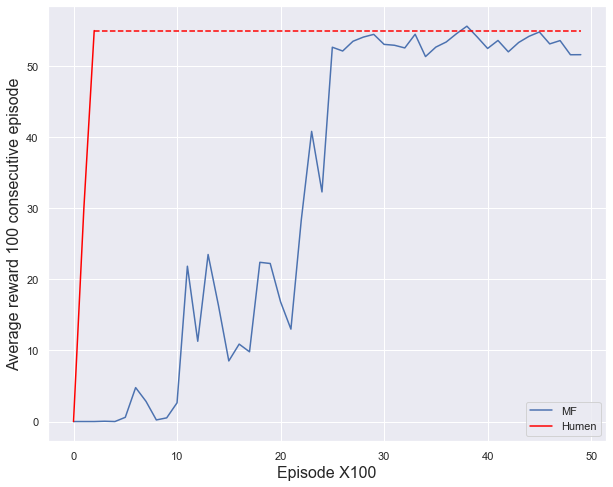

In [58]:
y = np.array(new_arr)
y = y + 200
m = np.mean(y.reshape(-1, 120), axis=1)
x = np.arange(0,50)
plt.figure(figsize=(10,8))
plt.plot(x,m,label='MF')
plt.plot(c,label="Humen",color='red')
plt.plot(e,d,'--',color='red')
plt.legend()
plt.xlabel("Episode X100",size=16)
plt.ylabel("Average reward 100 consecutive episode",size=16)
plt.show()